Psam
https://pdh.cnrs.fr/fr/


Checklist de base

Analyse de forme

    variable target : Psam_sum ; Psam_values (values)
    lignes et colonnes : 466667, 20
    types de variables :
        object     18
        int64       1
        float64     1
        X variables quantitative et Y variables qualitatives
    Analyse des valeurs manquantes : peu de NaN.
        Beaucoup de NaN sector (Only present if type is "Industrial site"), city, country : Empty only for points in the open sea
        
Analyse de fond

    Visualisation de la target :
    Signification des variables :
    Relation Variables / Target :

Analyse plus détaillée

    Analyse des relations directs entre nos différentes variables
        Relation Variable/Variable :
        Nan analyse :

Hypothèses nulle (H0)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [4]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)
data = pd.read_csv('data_pfas.csv', low_memory=False)
df = data.copy()
df.head()

,category,lat,lon,name,city,country,type,sector,source_type,source_text,source_url,dataset_id,dataset_name,pfas_values,unit,pfas_sum,details,matrix,date,year
0,Known PFAS user,"52,504114","-0,682637",3F,Corby,United Kingdom,Industrial site,NaN,Company website,3F,https://www.3fff.co.uk/,0,Known_PFAS_User_List,[],ng/l,NaN,{},NaN,NaN,NaN
1,Known PFAS user,"50,871865","6,034522",3M,Kerkrade,Netherlands,Industrial site,Manufacture of rubber and plastic products,Company website,3M,https://www.3mdeutschland.de/3M/de_DE/presse-d...,0,Known_PFAS_User_List,[],ng/l,NaN,"{""maps_link"": ""https://goo.gl/maps/z5dYoRaZxkK...",NaN,NaN,NaN
2,Known PFAS user,"50,223409","8,765597",3P - Performance Plastics Products,Karben,Germany,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.3pcorporate.com//wp-content/upload...,0,Known_PFAS_User_List,[],ng/l,NaN,{},NaN,NaN,NaN
3,Known PFAS user,"47,858601","5,347156",3P Performance Plastics Products,Langres,France,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.haute-marne.gouv.fr/content/downlo...,0,Known_PFAS_User_List,[],ng/l,NaN,{},NaN,NaN,NaN
4,Known PFAS user,"39,471674","-0,538828",3P Productos Plásticos Performantes,Valencia,Spain,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.3pcorporate.com//wp-content/upload...,0,Known_PFAS_User_List,[],ng/l,NaN,{},NaN,NaN,NaN


In [5]:
df.shape

(466667, 20)

<Axes: >

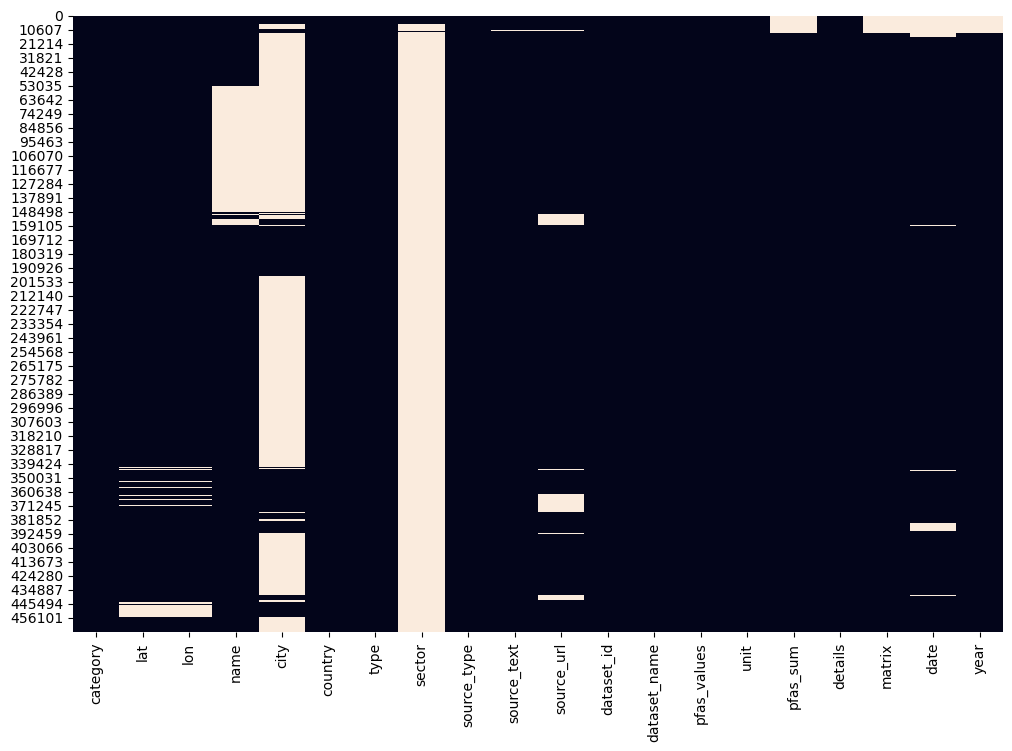

In [5]:
"""plt.figure(figsize=(12,8))          
sns.heatmap(df.isna(),cbar=False)"""

In [6]:
df.dtypes.value_counts()

object     18
int64       1
float64     1
Name: count, dtype: int64

In [7]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

category        0.000000
details         0.000000
unit            0.000000
pfas_values     0.000000
dataset_name    0.000000
dataset_id      0.000000
type            0.000000
source_type     0.000000
source_text     0.001196
country         0.001515
matrix          0.027838
year            0.027838
pfas_sum        0.027885
lon             0.034382
lat             0.034382
date            0.051433
source_url      0.060193
name            0.216418
city            0.753985
sector          0.985904
dtype: float64

In [8]:
df['pfas_sum'] = df['pfas_sum'].fillna(-1)

In [9]:
df['pfas_sum'].value_counts()

pfas_sum
0        266023
-1        13013
10         3927
2          3197
1          2986
          ...  
1829          1
2242          1
8495          1
1699          1
40,81         1
Name: count, Length: 23334, dtype: int64

In [10]:
def json_norm(df, column='pfas_values'):
    """
    Fonction pour traiter et normaliser les données JSON dans une colonne contenant des valeurs JSON.
    
    Paramètres :
    df (DataFrame) : DataFrame contenant la colonne avec les valeurs JSON à traiter.
    column (str) : Nom de la colonne contenant les valeurs JSON (par défaut 'pfas_values').
    
    Retourne :
    DataFrame : DataFrame avec les données JSON normalisées et l'index original conservé.
    """
    # Étape 1 : Appliquer json.loads si nécessaire et exploser les listes 'pfas_values'
    df_exploded = (
        df[[column]]  # Sélectionner uniquement la colonne 'pfas_values'
        .copy()
        .assign(pfas_values=lambda x: x[column].apply(lambda v: json.loads(v) if isinstance(v, str) else v))
        .explode(column)  # Exploser la colonne pour avoir une ligne par substance
    )

    # Étape 2 : Filtrer les lignes valides et normaliser les données JSON
    df_pfas = (
        df_exploded[df_exploded[column].notna()]  # Filtrer les lignes où 'pfas_values' n'est pas NaN
        .assign(pfas_values=lambda x: x[column].apply(lambda v: json.loads(v) if isinstance(v, str) else v))  # Appliquer json.loads si nécessaire
        .pipe(lambda x: pd.json_normalize(x[column]))  # Normaliser les données JSON en colonnes
    )

    # Étape 3 : Conserver l'index original
    df_pfas['index_original'] = df_exploded[df_exploded[column].notna()].index

    return df_pfas


In [11]:
df_pfas = json_norm(df, column='pfas_values')

In [12]:
df_pfas.shape

(3664587, 7)

In [13]:
df_pfas['substance'].value_counts()

substance
PFOS                                                                                                                    302400
PFOA                                                                                                                    275130
PFHxS                                                                                                                   230181
PFHxA                                                                                                                   225560
PFDA                                                                                                                    202400
                                                                                                                         ...  
Phosphonic acid, P-(1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,8-heptadecafluorooctyl)-, compd. with 4-methylbenzenamine (1:1)          1
PFDPA                                                                                                

In [14]:
df_pfas['cas_id'].value_counts()

cas_id
1763-23-1       364011
335-67-1        334759
355-46-4        230364
307-24-4        225560
335-76-2        202400
                 ...  
335-60-4             1
25065-50-3           1
54009-78-8           1
1263361-03-0         1
755-02-2             1
Name: count, Length: 177, dtype: int64

In [15]:
df_pfas['unit'].value_counts()

unit
ng/l     3118018
ng/kg     546569
Name: count, dtype: int64

In [16]:
df_pfas['isomer'].value_counts()

isomer
linear      62903
branched    58778
Name: count, dtype: int64

In [17]:
#plt.figure(figsize=(12,8))          
#sns.heatmap(df_pfas.isna(),cbar=False)

In [18]:
# 1. Grouper par 'cas_id' et créer une liste unique de substances
df_grouped = (
    df_pfas.groupby('cas_id')['substance']
    .apply(lambda x: list(set(x)))  # Supprimer les doublons
    .reset_index()
)

# 2. Calculer le nombre de substances uniques par 'cas_id'
df_grouped['substance_count'] = df_grouped['substance'].apply(len)

# 3. Classer les résultats par 'substance_count' de manière décroissante
df_grouped_sorted = df_grouped.sort_values(by='substance_count', ascending=False)

df_filtered = df_grouped_sorted[df_grouped_sorted['substance_count'] > 1]

C:\Users\User\AppData\Local\Temp\ipykernel_6712\2963444224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='substance_count', y='cas_id', data=df_filtered, palette='viridis')


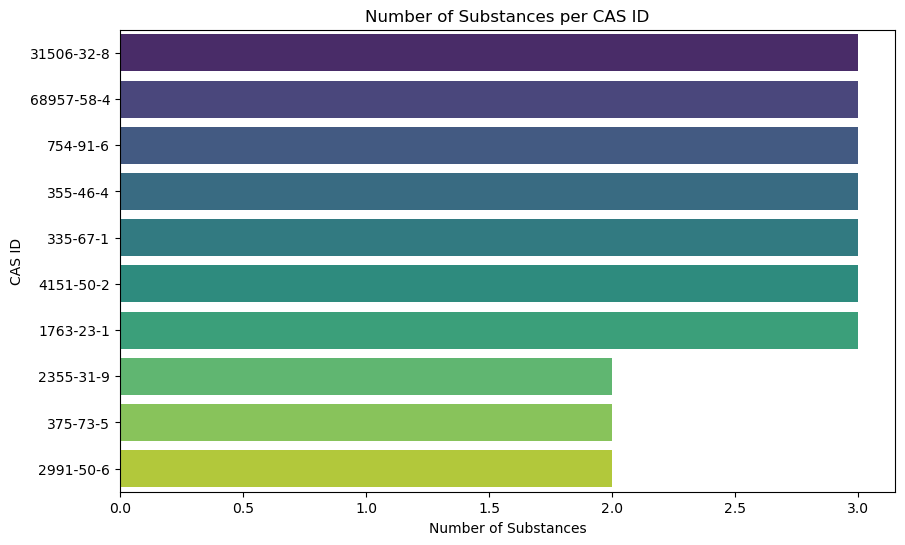

In [19]:
# Créer un barplot du nombre de substances par CAS ID
plt.figure(figsize=(10, 6))
sns.barplot(x='substance_count', y='cas_id', data=df_filtered, palette='viridis')
plt.title('Number of Substances per CAS ID')
plt.xlabel('Number of Substances')
plt.ylabel('CAS ID')
plt.show()

In [20]:
df_filtered

,cas_id,substance,substance_count
68,31506-32-8,"[n-MeFOSA, n-MeFOSA_linear, n-MeFOSA_branched]",3
142,68957-58-4,"[EtFOSAA_linear, EtFOSAA, EtFOSAA_branched]",3
149,754-91-6,"[FOSA, FOSA_linear, FOSA_branched]",3
83,355-46-4,"[PFHxS_linear, PFHxS, PFHxS_branched]",3
73,335-67-1,"[PFOA_branched, PFOA_linear, PFOA]",3
102,4151-50-2,"[N-Et-FOSA_branched, N-Et-FOSA_linear, N-Et-FOSA]",3
37,1763-23-1,"[PFOS_linear, PFOS, PFOS_branched]",3
44,2355-31-9,"[Glycine, N-[(heptadecafluorooctyl)sulfonyl]-N...",2
87,375-73-5,"[PFBS_branched, PFBS]",2
61,2991-50-6,"[N-Et-FOSA-A_linear, N-Et-FOSA-A]",2


In [21]:
df_positif = df_pfas.dropna(subset=['value'])
df_positif = df_positif.drop(columns=['less_than'])
df_positif

,cas_id,unit,substance,value,isomer,index_original
0,335-67-1,ng/l,PFOA,90.0,NaN,12991
1,1763-23-1,ng/l,PFOS,40.0,NaN,12991
2,335-67-1,ng/l,PFOA,200.0,NaN,12992
3,335-67-1,ng/l,PFOA,41400.0,NaN,12993
4,1763-23-1,ng/l,PFOS,500.0,NaN,12993
...,...,...,...,...,...,...
3664543,375-22-4,ng/l,PFBA,2.5,NaN,466666
3664544,2706-90-3,ng/l,PFPeA,1.7,NaN,466666
3664545,307-24-4,ng/l,PFHxA,1.5,NaN,466666
3664546,335-67-1,ng/l,PFOA,1.1,NaN,466666


In [22]:
# Résumé statistique des valeurs de la colonne 'value'
summary_stats = df_positif['value'].describe()
print(summary_stats)


count    6.072170e+05
mean     1.720591e+04
std      8.530167e+05
min     -3.790000e+00
25%      2.369650e+00
50%      8.000000e+00
75%      6.000000e+01
max      1.000000e+08
Name: value, dtype: float64


In [23]:
# Compter la fréquence des différentes substances
substance_count = df_positif['substance'].value_counts()
print(substance_count.head(15))  # Afficher les 15 substances les plus fréquentes


substance
PFOS             131216
PFOA             110175
PFHxA             61609
PFHxS             37120
PFBA              35631
PFHpA             33520
PFPeA             31542
PFBS              30746
PFOS_linear       16492
PFOA_linear       16215
PFOS_branched     13440
PFNA              10912
PFDA               8397
PFOA_branched      7296
6:2 FTSA           6217
Name: count, dtype: int64


In [24]:
substance_count = df_positif['cas_id'].value_counts()
print(substance_count.head(14))  # Afficher substance avec plus de 5000 prélèvements

cas_id
1763-23-1     161148
335-67-1      133686
307-24-4       61609
355-46-4       37226
375-22-4       35631
375-85-9       33520
2706-90-3      31542
375-73-5       30760
375-95-1       10912
335-76-2        8397
27619-97-2      6217
754-91-6        5831
45285-51-6      5526
2706-91-4       5254
Name: count, dtype: int64


In [25]:
# Calculer et trier les concentrations moyennes par cas_id en fonction du nombre d'occurrences
mean_concentration = df_positif.groupby('cas_id')['value'].mean().loc[df_positif['cas_id'].value_counts().index].round(3)
mean_concentration.head(14)


cas_id
1763-23-1      8829.141
335-67-1       9284.867
307-24-4       6282.150
355-46-4      61239.862
375-22-4      19599.052
375-85-9       1890.970
2706-90-3      5698.142
375-73-5      34654.888
375-95-1       1208.178
335-76-2       2039.195
27619-97-2     8560.895
754-91-6      50177.145
45285-51-6        4.784
2706-91-4     73828.367
Name: value, dtype: float64

In [26]:
# Étape 1 : Identifier les 14 cas_id les plus représentés
top_14_cas_id = df_positif['cas_id'].value_counts().nlargest(14).index

# Étape 2 : Filtrer les données pour ne garder que les 14 cas_id les plus représentés
df_filtered = df_positif[df_positif['cas_id'].isin(top_14_cas_id)]

# Étape 3 : Créer un dictionnaire pour associer chaque cas_id à sa ou ses substances correspondantes
cas_id_to_substances = df_positif.groupby('cas_id')['substance'].apply(lambda x: ', '.join(set(x))).to_dict()

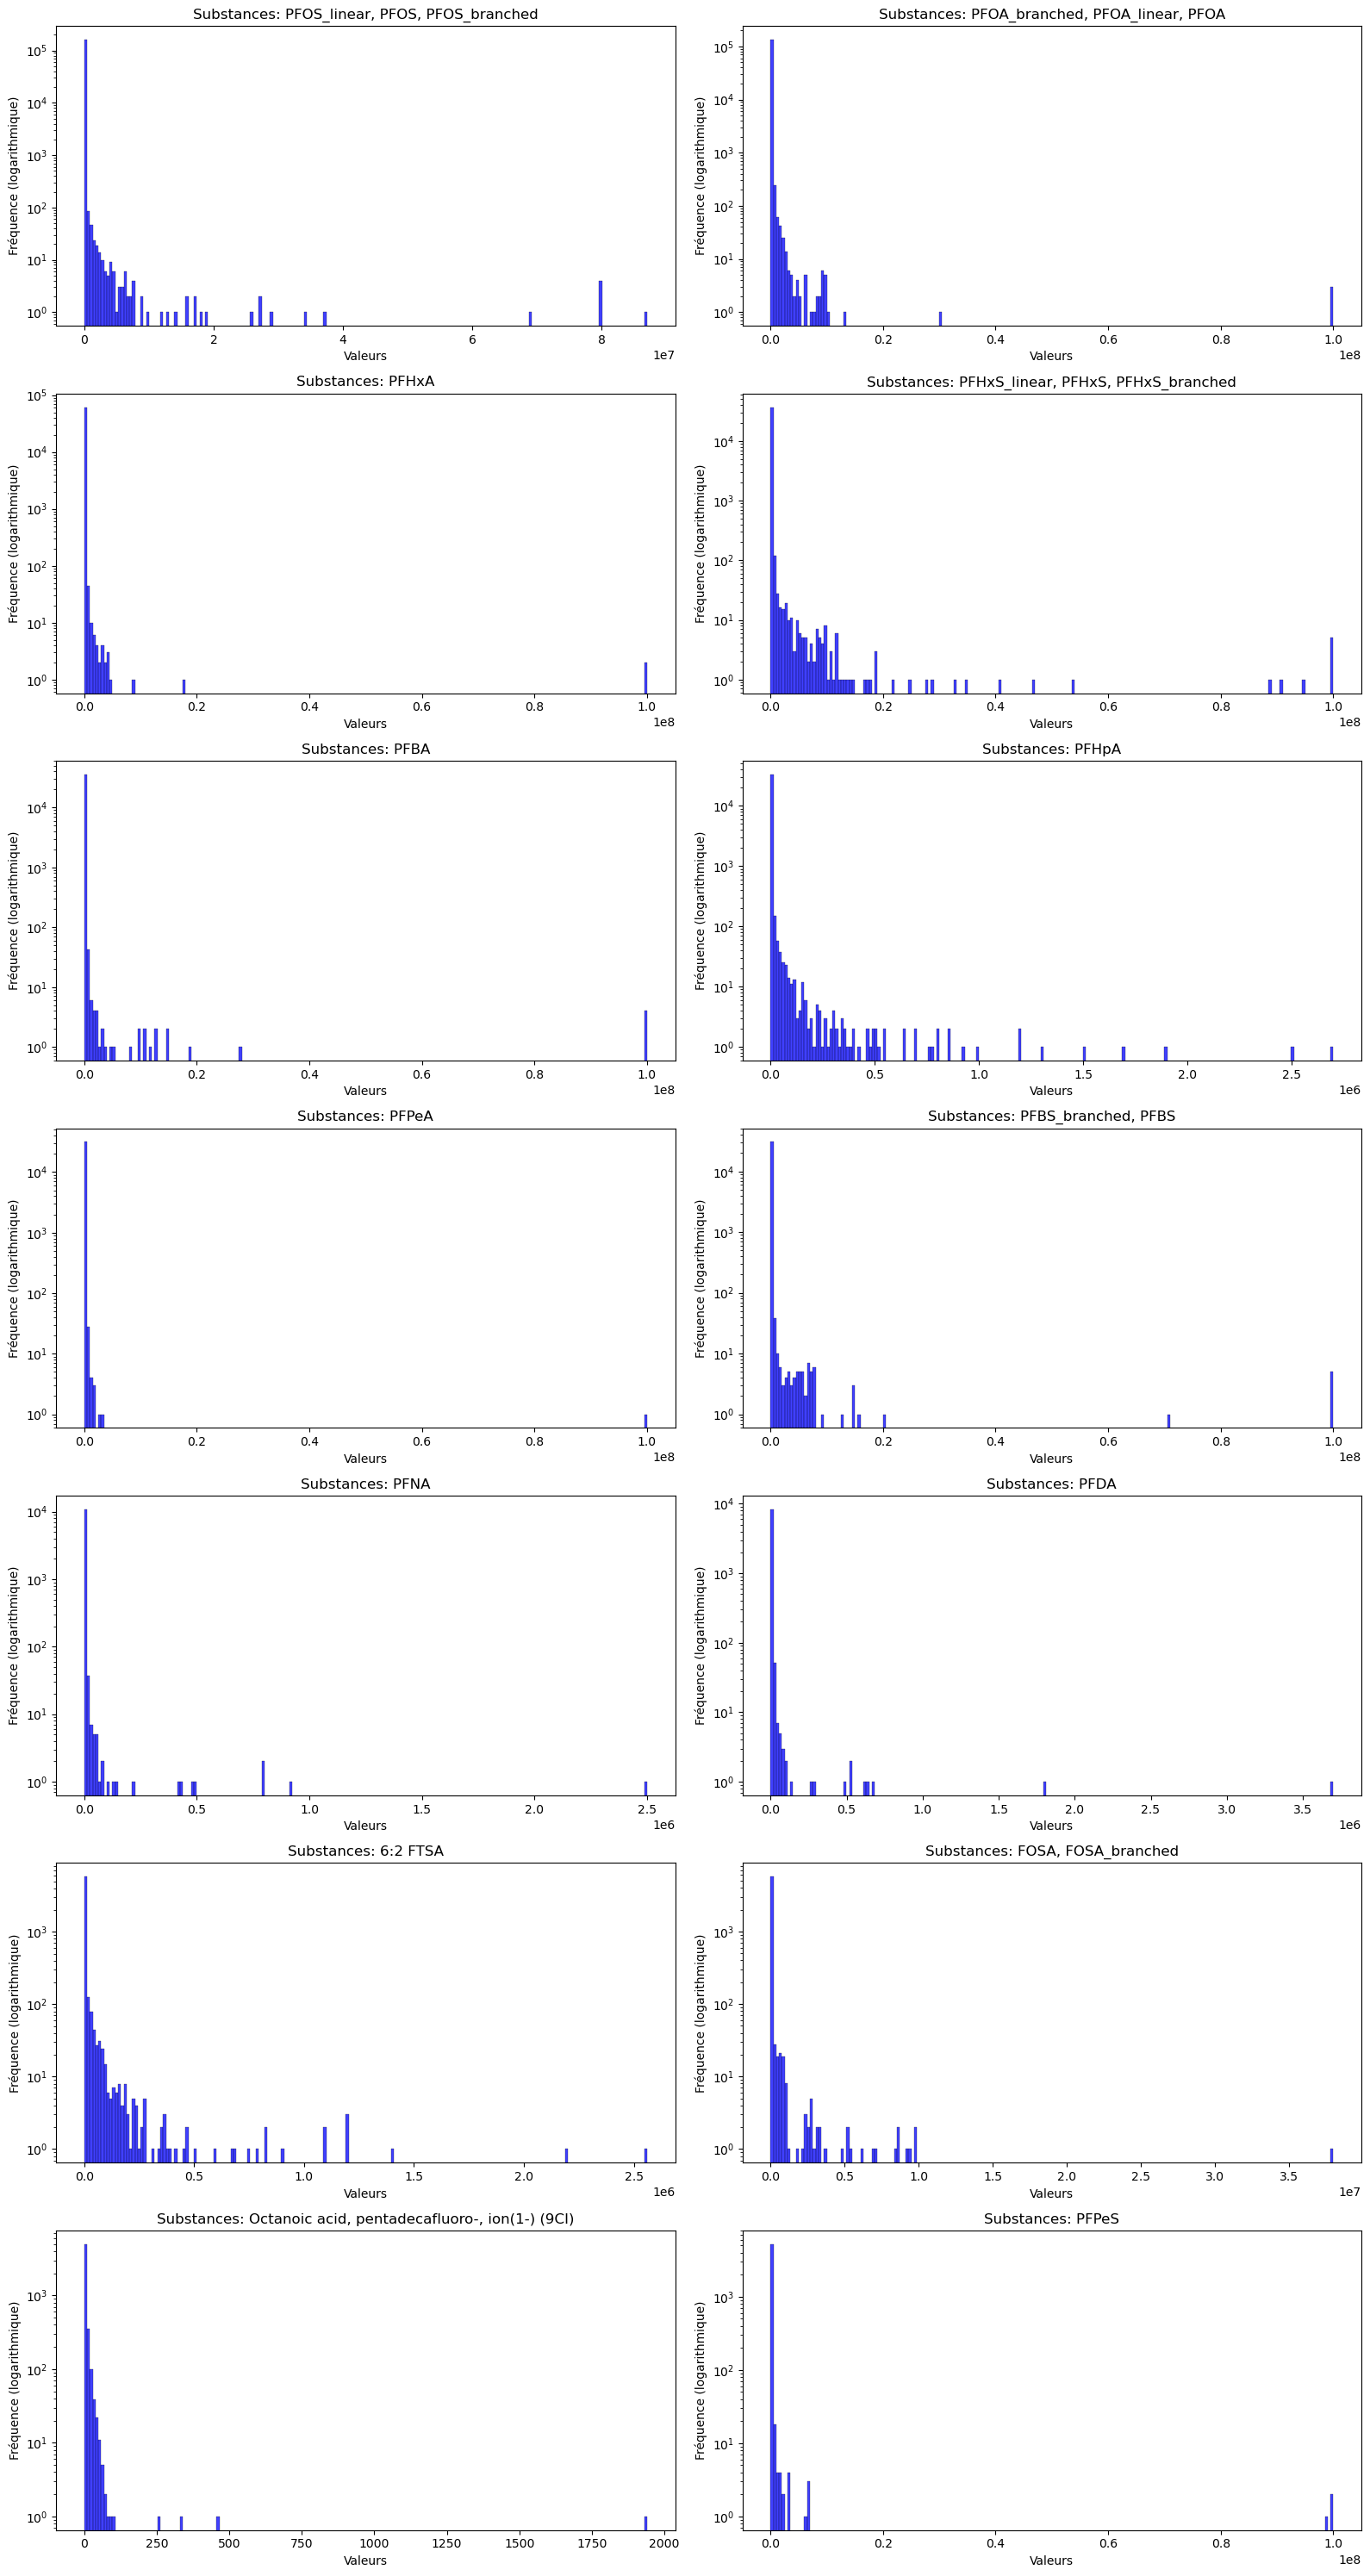

In [27]:
#Créer une figure avec subplots
fig, axes = plt.subplots(7, 2, figsize=(16, 30))  

# Boucle pour tracer un graphique distinct pour chaque cas_id
for i, cas_id in enumerate(top_14_cas_id):
    subset = df_filtered[df_filtered['cas_id'] == cas_id]['value'].dropna()
    
    # Sélectionner l'axe correspondant à ce cas_id
    ax = axes[i // 2, i % 2]  # Trouver la bonne position dans la grille (ligne, colonne)
    
    # Tracer un histogramme des valeurs
    sns.histplot(subset, bins=200, color='blue', kde=False, ax=ax)
    
    # Utiliser une échelle logarithmique sur l'axe Y
    ax.set_yscale('log')
    
    # Récupérer les substances correspondantes au cas_id
    substances = cas_id_to_substances.get(cas_id, 'Substance inconnue')
    
    # Ajouter des titres avec les substances
    ax.set_title(f'Substances: {substances}')
    ax.set_xlabel('Valeurs')
    ax.set_ylabel('Fréquence (logarithmique)')

# Ajuster l'espacement entre les subplots
plt.tight_layout()
plt.show()


In [28]:
df_filtered.to_csv('df_positif_top_14.csv', index=False)

In [29]:
most_frequent_combination = df[['lat', 'lon']].value_counts().sort_values(ascending=False).index[0]
df_most_frequent_place = df[(df['lat'] == most_frequent_combination[0]) & (df['lon'] == most_frequent_combination[1])]
df_most_frequent_place

,category,lat,lon,name,city,country,type,sector,source_type,source_text,source_url,dataset_id,dataset_name,pfas_values,unit,pfas_sum,details,matrix,date,year
54300,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,"[{""cas_id"": ""375-22-4"", ""unit"": ""ng/l"", ""subst...",ng/l,102,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-10-04,2021.0
54301,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,"[{""cas_id"": ""375-73-5"", ""unit"": ""ng/l"", ""subst...",ng/l,28,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-10-04,2021.0
54302,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,"[{""cas_id"": ""335-76-2"", ""unit"": ""ng/l"", ""subst...",ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-10-04,2021.0
54303,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,"[{""cas_id"": ""307-55-1"", ""unit"": ""ng/l"", ""subst...",ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-10-04,2021.0
54304,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,"[{""cas_id"": ""375-85-9"", ""unit"": ""ng/l"", ""subst...",ng/l,5,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-10-04,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127746,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,"[{""cas_id"": ""376-06-7"", ""unit"": ""ng/l"", ""subst...",ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2023-01-16,2023.0
127747,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,"[{""cas_id"": ""72629-94-8"", ""unit"": ""ng/l"", ""sub...",ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2023-01-16,2023.0
127748,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,"[{""cas_id"": ""791563-89-8"", ""unit"": ""ng/l"", ""su...",ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2023-01-16,2023.0
127749,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,"[{""cas_id"": ""2058-94-8"", ""unit"": ""ng/l"", ""subs...",ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2023-01-16,2023.0


In [30]:
# Normalisation des données JSON en DataFrame et définition de l'index
df_pfas_most_frequent_place = json_norm(df_most_frequent_place, column='pfas_values')
df_pfas_most_frequent_place.set_index('index_original', inplace=True)

# Concaténer les deux DataFrames sur les colonnes et supprimer les colonnes inutiles
df_all = pd.concat([df_most_frequent_place, df_pfas_most_frequent_place], axis=1).drop(['pfas_values'], axis=1)

# Convertir la colonne 'date' au format datetime et trier les données par date
df_all['date'] = pd.to_datetime(df_all['date'], format='%Y-%m-%d')
df_all_bydate = df_all.sort_values(by='date')

# Afficher le DataFrame final
df_all_bydate.head()

,category,lat,lon,name,city,country,type,sector,source_type,source_text,source_url,dataset_id,dataset_name,unit,pfas_sum,details,matrix,date,year,cas_id,unit,substance,value,less_than
54496,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,4,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-08-10,2021.0,375-85-9,ng/l,PFHpA,4.0,NaN
54493,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,43,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-08-10,2021.0,375-73-5,ng/l,PFBS,43.0,NaN
54494,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-08-10,2021.0,335-76-2,ng/l,PFDA,NaN,2.0
54495,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-08-10,2021.0,307-55-1,ng/l,PFDoDA,NaN,2.0
54497,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,11,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-08-10,2021.0,307-24-4,ng/l,PFHxA,11.0,NaN


In [31]:
df_all_bydate = df_all[df_all['cas_id'] == df_all['cas_id'].value_counts().sort_values(ascending=False).index[0]]
df_all_bydate


,category,lat,lon,name,city,country,type,sector,source_type,source_text,source_url,dataset_id,dataset_name,unit,pfas_sum,details,matrix,date,year,cas_id,unit,substance,value,less_than
54310,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-10-04,2021.0,754-91-6,ng/l,FOSA,NaN,3.0
54350,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-12-06,2021.0,754-91-6,ng/l,FOSA,NaN,2.0
54450,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-09-09,2021.0,754-91-6,ng/l,FOSA,NaN,2.0
54502,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-08-10,2021.0,754-91-6,ng/l,FOSA,NaN,3.0
55149,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-11-22,2021.0,754-91-6,ng/l,FOSA,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126112,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,"3,2","{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2023-10-13,2023.0,754-91-6,ng/l,FOSA,3.2,NaN
126113,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,4,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2023-10-13,2023.0,754-91-6,ng/l,FOSA,4.0,NaN
127711,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2023-01-16,2023.0,754-91-6,ng/l,FOSA,NaN,10.0
127742,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2023-01-16,2023.0,754-91-6,ng/l,FOSA,NaN,10.0


In [32]:
df_all_bydate = df_all_bydate[(df_all_bydate['less_than'] <= 4) | (pd.isna(df_all_bydate['less_than']))]

df_all_bydate.head(80)

,category,lat,lon,name,city,country,type,sector,source_type,source_text,source_url,dataset_id,dataset_name,unit,pfas_sum,details,matrix,date,year,cas_id,unit,substance,value,less_than
54310,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-10-04,2021.0,754-91-6,ng/l,FOSA,NaN,3.00
54350,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-12-06,2021.0,754-91-6,ng/l,FOSA,NaN,2.00
54450,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-09-09,2021.0,754-91-6,ng/l,FOSA,NaN,2.00
54502,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-08-10,2021.0,754-91-6,ng/l,FOSA,NaN,3.00
55149,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-11-22,2021.0,754-91-6,ng/l,FOSA,NaN,2.00
57173,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-09-01,2022.0,754-91-6,ng/l,FOSA,NaN,3.70
57200,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-09-01,2022.0,754-91-6,ng/l,FOSA,NaN,2.55
57201,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-09-01,2022.0,754-91-6,ng/l,FOSA,NaN,2.55
57346,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-02-02,2022.0,754-91-6,ng/l,FOSA,NaN,2.40
57374,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-02-02,2022.0,754-91-6,ng/l,FOSA,NaN,2.40


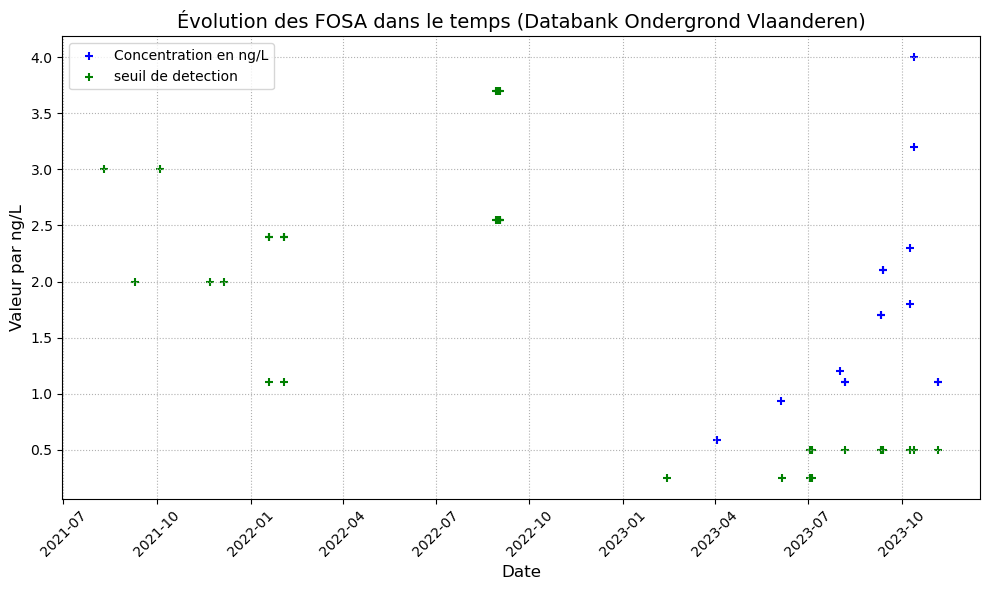

In [33]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))

plt.scatter(df_all_bydate['date'][df_all_bydate['value'].notna()],
            df_all_bydate['value'][df_all_bydate['value'].notna()],
            marker='+', c='b', label='Concentration en ng/L')

plt.scatter(df_all_bydate['date'], df_all_bydate['less_than'], marker='+', c='g', label = 'seuil de detection')
# Ajouter des titres et des labels
plt.title('Évolution des FOSA dans le temps (Databank Ondergrond Vlaanderen)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Valeur par ng/L', fontsize=12)
plt.legend()
# Ajuster la fréquence des étiquettes de date pour améliorer la lisibilité

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Étiquettes tous les 3 mois
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format de date : Année-Mois

# Faire pivoter les étiquettes de date
plt.xticks(rotation=45)
plt.grid(linestyle=':')
# Afficher le graphique
plt.tight_layout()
plt.show()

In [34]:
df_all_bydate = df_all[df_all['cas_id'] == df_all['cas_id'].value_counts().sort_values(ascending=False).index[1]]
df_all_bydate

,category,lat,lon,name,city,country,type,sector,source_type,source_text,source_url,dataset_id,dataset_name,unit,pfas_sum,details,matrix,date,year,cas_id,unit,substance,value,less_than
54308,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,10,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-10-04,2021.0,335-67-1,ng/l,PFOA,10.00,NaN
54348,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,10,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-12-06,2021.0,335-67-1,ng/l,PFOA,10.00,NaN
54448,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,9,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-09-09,2021.0,335-67-1,ng/l,PFOA,9.00,NaN
54500,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,11,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-08-10,2021.0,335-67-1,ng/l,PFOA,11.00,NaN
55147,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,9,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-11-22,2021.0,335-67-1,ng/l,PFOA,9.00,NaN
57195,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-09-01,2022.0,335-67-1,ng/l,PFOA,NaN,7.7
57196,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-09-01,2022.0,335-67-1,ng/l,PFOA,NaN,7.7
57369,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,"7,8","{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-02-02,2022.0,335-67-1,ng/l,PFOA,7.80,NaN
57370,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,9,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-02-02,2022.0,335-67-1,ng/l,PFOA,9.00,NaN
57492,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,"10,5","{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-03-02,2022.0,335-67-1,ng/l,PFOA,10.50,NaN


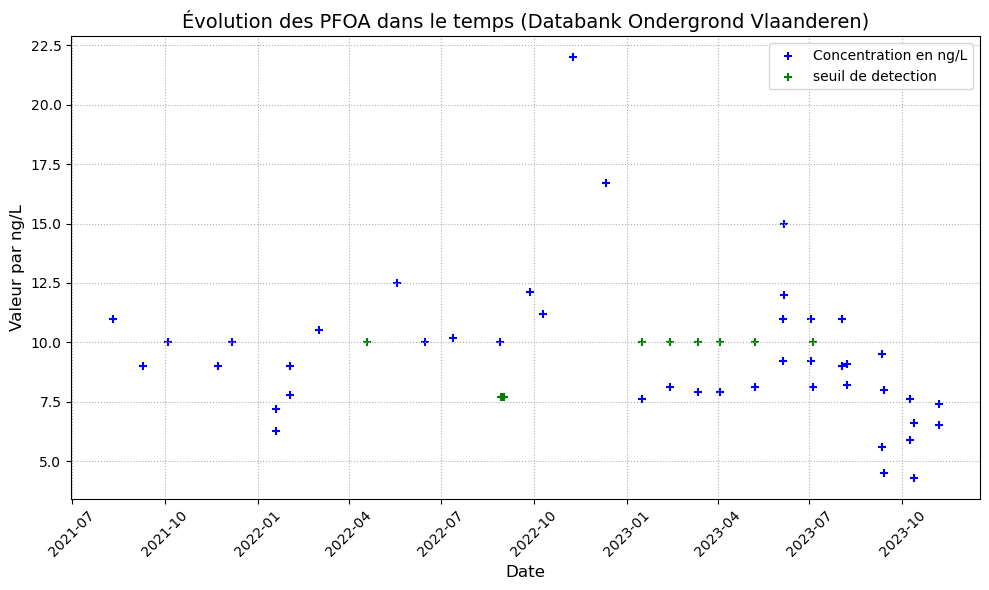

In [35]:
plt.figure(figsize=(10, 6))

plt.scatter(df_all_bydate['date'][df_all_bydate['value'].notna()],
            df_all_bydate['value'][df_all_bydate['value'].notna()],
            marker='+', c='b', label='Concentration en ng/L')

plt.scatter(df_all_bydate['date'], df_all_bydate['less_than'], marker='+', c='g', label = 'seuil de detection')
# Ajouter des titres et des labels
plt.title('Évolution des PFOA dans le temps (Databank Ondergrond Vlaanderen)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Valeur par ng/L', fontsize=12)
plt.legend()
# Ajuster la fréquence des étiquettes de date pour améliorer la lisibilité

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Étiquettes tous les 3 mois
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format de date : Année-Mois

# Faire pivoter les étiquettes de date
plt.xticks(rotation=45)
plt.grid(linestyle=':')
# Afficher le graphique
plt.tight_layout()
plt.show()

In [36]:
df_all_bydate = df_all[df_all['cas_id'] == df_all['cas_id'].value_counts().sort_values(ascending=False).index[2]]
df_all_bydate

,category,lat,lon,name,city,country,type,sector,source_type,source_text,source_url,dataset_id,dataset_name,unit,pfas_sum,details,matrix,date,year,cas_id,unit,substance,value,less_than
54309,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,18,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-10-04,2021.0,1763-23-1,ng/l,PFOS,18.000,NaN
54349,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,17,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-12-06,2021.0,1763-23-1,ng/l,PFOS,17.000,NaN
54449,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,21,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-09-09,2021.0,1763-23-1,ng/l,PFOS,21.000,NaN
54501,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,18,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-08-10,2021.0,1763-23-1,ng/l,PFOS,18.000,NaN
55148,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,15,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2021-11-22,2021.0,1763-23-1,ng/l,PFOS,15.000,NaN
57198,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,9,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-09-01,2022.0,1763-23-1,ng/l,PFOS,9.000,NaN
57199,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,12,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-09-01,2022.0,1763-23-1,ng/l,PFOS,12.000,NaN
57372,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,"8,64","{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-02-02,2022.0,1763-23-1,ng/l,PFOS,8.640,NaN
57373,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,15,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-02-02,2022.0,1763-23-1,ng/l,PFOS,15.000,NaN
57493,Known,"51,29883","4,28847",NaN,NaN,Belgium,Sampling location,NaN,Authorities,Databank Ondergrond Vlaanderen,https://www.dov.vlaanderen.be/portaal/?module=...,16,Flanders DOV,ng/l,0,"{""data_type"": ""pfas:pfas_oppwater"", ""ogc_fid"":...",Surface water,2022-03-02,2022.0,1763-23-1,ng/l,PFOS,NaN,15.00


In [37]:
df_pfas.head()

,cas_id,unit,substance,value,isomer,less_than,index_original
0,335-67-1,ng/l,PFOA,90.0,NaN,NaN,12991
1,1763-23-1,ng/l,PFOS,40.0,NaN,NaN,12991
2,335-67-1,ng/l,PFOA,200.0,NaN,NaN,12992
3,335-67-1,ng/l,PFOA,41400.0,NaN,NaN,12993
4,1763-23-1,ng/l,PFOS,500.0,NaN,NaN,12993


In [38]:
df_pfas

,cas_id,unit,substance,value,isomer,less_than,index_original
0,335-67-1,ng/l,PFOA,90.0,NaN,NaN,12991
1,1763-23-1,ng/l,PFOS,40.0,NaN,NaN,12991
2,335-67-1,ng/l,PFOA,200.0,NaN,NaN,12992
3,335-67-1,ng/l,PFOA,41400.0,NaN,NaN,12993
4,1763-23-1,ng/l,PFOS,500.0,NaN,NaN,12993
...,...,...,...,...,...,...,...
3664582,41997-13-1,ng/l,"1,1,2,2,3,3,4,4,5,5,6,6,6-Tridecafluoro-1-hexa...",NaN,NaN,0.5,466666
3664583,355-46-4,ng/l,PFHxS,NaN,NaN,0.5,466666
3664584,68259-12-1,ng/l,PFNS,NaN,NaN,0.5,466666
3664585,1763-23-1,ng/l,PFOS,NaN,NaN,0.5,466666


In [9]:
df['dataset_id'].value_counts()

dataset_id
29     144424
16     132545
101     45979
28      37991
54      17496
        ...  
98          3
100         1
92          1
6           1
109         1
Name: count, Length: 105, dtype: int64

In [23]:
df[['lat', 'lon']].value_counts().sort_values(ascending=False)

lat        lon      
51,29883   4,28847      1412
51,22324   4,39405      1247
51,09315   3,67545       947
51,353     4,24068       908
51,13183   5,84214       899
                        ... 
52,662021  10,912282       1
52,661056  -0,567032       1
52,66034   -0,45361        1
52,6583    -1,727059       1
84,0505    31,1138         1
Name: count, Length: 62636, dtype: int64